# 20230524

In [1]:
from case_functions import *


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
storm_id = 12, 32
meso_id = 8, 27

In [3]:
d = '20230524'
ka = 'ka2'
Ka = 'Ka2'
weights = [0.05, 0.2, 0.5, 0.2, 0.05]

In [4]:
vads = sorted(glob.glob(f'/Volumes/Buhrman_4TB/dealiased_data/{d}/{ka}/*.nc'))
print(f'The number of VADs for {d} {Ka} is: {np.shape(vads)} VADs')
gps = pd.read_csv(f'/Volumes/Buhrman_4TB/product_raw/{ka}/GPS_{Ka}_{d}.txt', dtype='str')

The number of VADs for 20230524 Ka2 is: (476,) VADs


In [5]:
tobac_features_xr_refl = xr.open_dataset(f'/Users/juliabman/Desktop/research2024/tobac_Save/{d}_tobac_Plot/{d}_Track_refl.nc')
tobac_df_refl = tobac_id(tobac_features_xr_refl, storm_id)
latitude_weighted_tobac, longitude_weighted_tobac, storm_bearing, storm_speed, storm_times = storm_speed_and_bearing(tobac_df_refl, weights)

tobac_features_xr_shear = xr.open_dataset(f'/Users/juliabman/Desktop/research2024/tobac_Save/{d}_tobac_Plot/{d}_Track_shear.nc')
tobac_df_shear = tobac_id(tobac_features_xr_shear, meso_id)
latitude_weighted_tobac_meso, longitude_weighted_tobac_meso, meso_bearing, meso_speed, meso_times = storm_speed_and_bearing(tobac_df_shear, weights)

#grib_nc = xr.open_dataset(f'/Users/juliabman/Desktop/concat_test/{d}_grib.nc')
#lats, lons, times, shears = azshear_grib_variables(grib_nc)

# data that DOES depend on vads information
vads = sorted(glob.glob(f'/Volumes/Buhrman_4TB/dealiased_data/{d}/{ka}/*.nc'))
print(f'The number of VADs for {d} {Ka} is: {np.shape(vads)} VADs')
gps = pd.read_csv(f'/Volumes/Buhrman_4TB/product_raw/{ka}/GPS_{Ka}_{d}.txt', dtype='str')

easterlies_vads, westerlies_vads, secondtrip_vads = vads_sort(vads, gps)
print(f"""
The number of easterly VADs for {d} {Ka} is: {np.shape(easterlies_vads)} VADs
The number of westerly VADs for {d} {Ka} is: {np.shape(westerlies_vads)} VADs
The number of second trip VADs for {d} {Ka} is: {np.shape(secondtrip_vads)} VADs
""")

vad_times, tobac_times, tobac_indeces, tobac_lats, tobac_lons = nearest_tobac_time(easterlies_vads, 
                                                                               np.array(latitude_weighted_tobac),
                                                                               np.array(longitude_weighted_tobac),
                                                                               storm_times[:-1])
storm_bearing_tobac_vads = storm_bearing[tobac_indeces]
storm_vel_tobac_vads = storm_speed[tobac_indeces]

meso_vad_times, meso_times, meso_indeces, meso_lats, meso_lons = nearest_tobac_time(easterlies_vads, 
                                                                               np.array(latitude_weighted_tobac_meso),
                                                                               np.array(longitude_weighted_tobac_meso),
                                                                               meso_times[:-1])

meso_bearing_tobac_vads = meso_bearing[meso_indeces]
meso_vel_tobac_vads = meso_speed[meso_indeces]

vad_df = vad_df_new(easterlies_vads, gps, vad_times, tobac_times, tobac_indeces, tobac_lats, tobac_lons)

The number of VADs for 20230524 Ka2 is: (476,) VADs


/Users/juliabman/Desktop/research2024/cases/case_functions.py:306: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  tobac_times_datetime = tobac_times.astype('datetime64[s]')
/Users/juliabman/Desktop/research2024/cases/case_functions.py:306: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Va


The number of easterly VADs for 20230524 Ka2 is: (176,) VADs
The number of westerly VADs for 20230524 Ka2 is: (10,) VADs
The number of second trip VADs for 20230524 Ka2 is: (290,) VADs



In [6]:
data = pd.read_csv(f'/Users/juliabman/Desktop/storm_events_data/storm_data_search_results_{d}.csv')
tor_df = tor_id(vad_df, data, str('Tornado'), str('BROADVIEW'), str('US/Mountain'), False)
vad_df.insert(4, 'Tor', tor_df)

1800 BROADVIEW
2023-05-24 18:00:00
2023-05-25 01:00:00+00:00


Get the max values over time of the target mesocyclones using the Features_shear dataset.

In [7]:
meso_stats = xr.open_dataset(f'/Users/juliabman/Desktop/research2024/tobac_Save/{d}_tobac_Plot/{d}_Features_shear.nc')

In [8]:
meso_stats

<xarray.Dataset>
Dimensions:          (index: 477)
Coordinates:
  * index            (index) int64 0 1 2 3 4 5 6 ... 470 471 472 473 474 475 476
Data variables: (12/14)
    frame            (index) int64 ...
    idx              (index) int64 ...
    hdim_1           (index) int64 ...
    hdim_2           (index) int64 ...
    num              (index) int64 ...
    threshold_value  (index) int64 ...
    ...               ...
    max              (index) float32 ...
    feature          (index) int64 ...
    time             (index) datetime64[ns] ...
    timestr          (index) <U19 ...
    latitude         (index) float64 ...
    longitude        (index) float64 ...

In [9]:
if not isinstance(meso_id, (list, set)):
    meso_id = [meso_id]
    
    meso_indeces = tobac_features_xr_shear['cell'].where(tobac_features_xr_shear['cell'].isin(meso_id), drop=True)

meso_ids = meso_indeces.index


In [10]:
meso_ids

<xarray.DataArray 'index' (index: 18)>
array([ 13,  18,  23,  40,  44,  52,  59,  73,  92,  94, 151, 161, 163, 174,
       181, 247, 257, 378])
Coordinates:
  * index    (index) int64 13 18 23 40 44 52 59 ... 161 163 174 181 247 257 378

In [11]:
if not isinstance(meso_ids, (list, set)):
    meso_ids = [meso_ids]
    
    meso_indeces2 = meso_stats['idx'].index.where(meso_stats['idx'].index.isin(meso_ids), drop=True)

meso_ids_stats = meso_indeces2.index


In [12]:
meso_ids_stats

<xarray.DataArray 'index' (index: 18)>
array([ 13,  18,  23,  40,  44,  52,  59,  73,  92,  94, 151, 161, 163, 174,
       181, 247, 257, 378])
Coordinates:
  * index    (index) int64 13 18 23 40 44 52 59 ... 161 163 174 181 247 257 378

In [13]:
wanted_meso_max = meso_stats['max'][meso_ids_stats].values

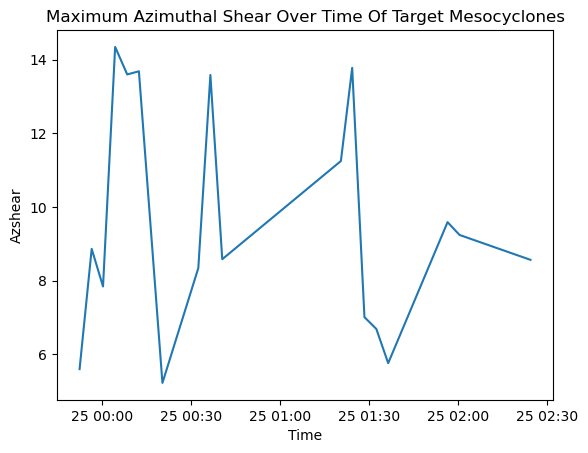

In [14]:
fig = plt.figure()
plt.plot(meso_stats['time'][meso_ids_stats], wanted_meso_max)
plt.title('Maximum Azimuthal Shear Over Time Of Target Mesocyclones')
plt.xlabel('Time')
plt.ylabel('Azshear')
plt.show()

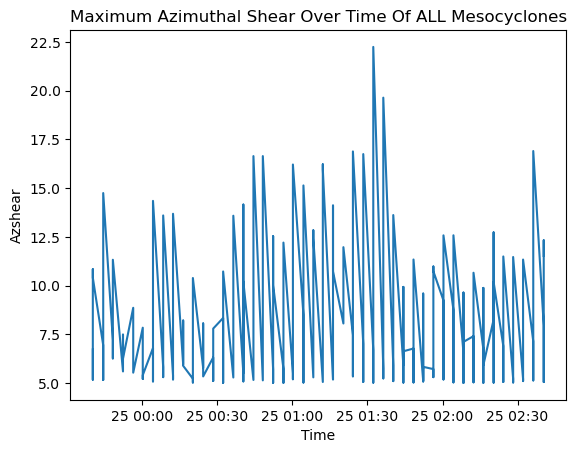

In [15]:
fig = plt.figure()
plt.plot(meso_stats['time'], meso_stats['max'].values)
plt.title('Maximum Azimuthal Shear Over Time Of ALL Mesocyclones')
plt.xlabel('Time')
plt.ylabel('Azshear')
plt.show()

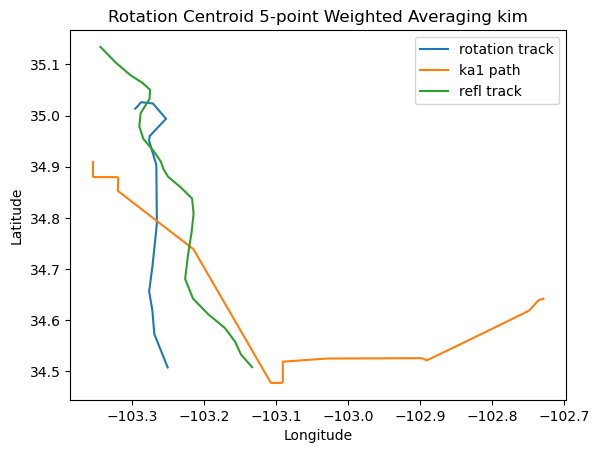

In [16]:
from matplotlib import rcParams, rcParamsDefault
rcParams.update(rcParamsDefault)

fig = plt.figure()
plt.plot(longitude_weighted_tobac_meso, latitude_weighted_tobac_meso)
plt.plot(vad_df.Lonmean, vad_df.Latmean)
#plt.plot(vad_df_ka2.Lonmean, vad_df_ka2.Latmean)
plt.plot(longitude_weighted_tobac, latitude_weighted_tobac)
plt.title('Rotation Centroid 5-point Weighted Averaging kim')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(['rotation track', 'ka1 path', 'refl track'])
plt.show()

In [17]:
meso_to_ka_dist= []
meso_to_ka_bear = []
for i in range(len(meso_lats)):
    #print(rot_lats[i])
    fwd_az, back_az, distance = geodesic.inv(vad_df.Lonmean[i], vad_df.Latmean[i], meso_lons[i], meso_lats[i])
    # distance in m, az in degrees clockwise from N
    distance_km = distance / 1000
    meso_to_ka_dist.append(distance_km)
    meso_to_ka_bear.append(fwd_az)
    #storm_bearing_rot.append(fwd_az)

In [18]:
storm_bearing_tobac_vads

array([ 150,  150,  150,  150,  150,  150,  150,  150,  150,  150,  150,
        150,  150,  150,  150,  150,  150,  150,  150,  150,  150,  150,
        150,  150,  150,  150,  150,  150,  150,  145,  145,  145,  145,
        145,  145,  145,  145,  145,  145,  145,  145, -178, -159, -159,
       -159, -159, -159, -159, -159, -159, -159, -159, -176, -176, -176,
       -176, -176, -176, -176, -176, -176, -176, -176, -176, -176, -176,
        158,  144,  144,  144,  144,  144,  144,  144,  144,  144,  144,
        144,  144,  144,  156,  156,  156,  156,  156,  156,  156,  156,
        156,  156,  156,  164,  164,  164,  164,  164,  164,  164,  164,
        164,  164,  164,  164,  164,  164,  164,  164,  164,  164,  164,
        164,  164,  164,  164,  164,  164,  164,  164,  164,  164,  164,
        152,  152,  152,  152,  152,  152,  152,  152,  152,  152,  152,
        152,  152,  152,  152,  152,  152,  152,  152,  152,  152,  152,
        152,  152,  152,  152,  152,  152,  152,  1

(176,)
(176,)


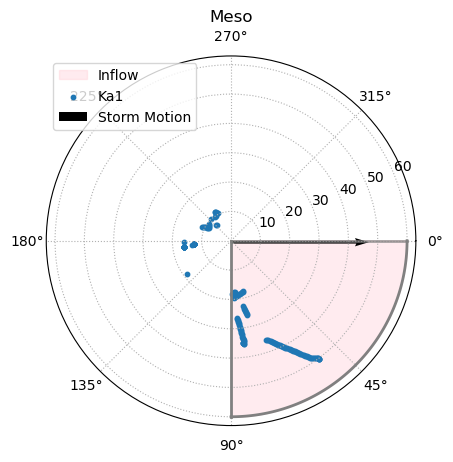

In [19]:
theta, r = polar_plot('Meso', meso_to_ka_bear, storm_bearing_tobac_vads, meso_to_ka_dist, 'Ka1')

In [20]:
theta_deg = theta * (180/np.pi)

In [21]:
inflow_vads, not_inflow_vads, nearfield_vads, farfield_vads, inflow_column, distance_column = inflow_near_far(storm_bearing_tobac_vads, theta_deg, easterlies_vads, meso_to_ka_dist, 90, 0)

18.23968141445896
0
19.388984323489076
1
19.372154434339013
2
19.201211429865182
3
19.021105653198493
4
18.843377833527498
5
18.670497177321547
6
18.502614835063774
7
18.33094929562635
8
18.144509163805317
9
17.96834829124108
10
17.813165583728118
11
17.678325664313306
12
17.545802451099902
13
17.43143184915992
14


In [22]:
vad_df['Inflow'] = inflow_column
vad_df['Distance'] = distance_column

In [23]:
vad_df

,Datetime,Radar,Velmean,Velvar,Tor,Bearmean,Latmean,Latvar,Lonmean,Lonvar,tobac_times,tobac_indeces,tobac_lats,tobac_lons,Inflow,Distance
0,2023-05-24 23:51:26,<pyart.core.radar.Radar object at 0x3018f9370>,0.000000,0.000000,pre tor,327.990000,34.909078,0.000000e+00,-103.354044,7.407407e-13,2023-05-25 00:06:33,0,35.134331,-103.343906,Not in Inflow,12.784099
1,2023-05-24 23:55:53,<pyart.core.radar.Radar object at 0x3018a0a00>,0.000000,0.000000,pre tor,327.990000,34.909070,5.469436e-29,-103.354043,2.187774e-28,2023-05-25 00:06:33,0,35.134331,-103.343906,Not in Inflow,12.784897
2,2023-05-24 23:56:06,<pyart.core.radar.Radar object at 0x3007c78e0>,0.000000,0.000000,pre tor,327.990000,34.909070,5.469436e-29,-103.354043,2.187774e-28,2023-05-25 00:06:33,0,35.134331,-103.343906,Not in Inflow,12.784897
3,2023-05-24 23:56:18,<pyart.core.radar.Radar object at 0x30182d730>,0.000000,0.000000,pre tor,327.990000,34.909070,5.469436e-29,-103.354044,3.917379e-13,2023-05-25 00:06:33,0,35.134331,-103.343906,Not in Inflow,12.784906
4,2023-05-24 23:56:31,<pyart.core.radar.Radar object at 0x3007a1b20>,0.001538,0.000031,pre tor,327.990000,34.909067,0.000000e+00,-103.354047,2.187774e-28,2023-05-25 00:06:33,0,35.134331,-103.343906,Not in Inflow,12.785360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,2023-05-25 02:16:22,<pyart.core.radar.Radar object at 0x306491a00>,33.343077,0.811756,post tor,66.712308,34.640935,5.571150e-08,-102.731897,4.517749e-07,2023-05-25 02:08:24,23,34.532998,-103.148694,Farfield,49.841841
172,2023-05-25 02:16:35,<pyart.core.radar.Radar object at 0x3065bd610>,30.532308,16.618303,post tor,80.456154,34.641473,7.647685e-09,-102.729570,4.537726e-07,2023-05-25 02:08:24,23,34.532998,-103.148694,Farfield,50.061693
173,2023-05-25 02:16:48,<pyart.core.radar.Radar object at 0x3065bd580>,5.924615,40.022710,post tor,89.010769,34.641585,1.164530e-11,-102.728228,1.346546e-08,2023-05-25 02:08:24,23,34.532998,-103.148694,Farfield,50.185235
174,2023-05-25 02:17:01,<pyart.core.radar.Radar object at 0x306491520>,4.838462,6.830564,post tor,151.948462,34.641668,5.859544e-09,-102.728129,1.994729e-09,2023-05-25 02:08:24,23,34.532998,-103.148694,Farfield,50.195549


In [24]:
np.shape(nearfield_vads)

(15,)

In [25]:
nearfield_vad_times, nearfield_times, nearfield_indeces, nearfield_lats, nearfield_lons = nearest_tobac_time(nearfield_vads, 
                                                                                       np.array(latitude_weighted_tobac),
                                                                                       np.array(longitude_weighted_tobac),
                                                                                       storm_times[:-1])

In [26]:
nearfield_bearing = storm_bearing[nearfield_indeces]
nearfield_velocity = storm_speed[nearfield_indeces]

In [27]:
farfield_vad_times, farfield_times, farfield_indeces, farfield_lats, farfield_lons = nearest_tobac_time(farfield_vads, 
                                                                                       np.array(latitude_weighted_tobac),
                                                                                       np.array(longitude_weighted_tobac),
                                                                                       storm_times[:-1])

In [28]:
farfield_bearing = storm_bearing[farfield_indeces]
farfield_velocity = storm_speed[farfield_indeces]

In [29]:
nearfield_u, nearfield_v, nearfield_heights = composite_u_and_v(nearfield_vads, gps, nearfield_velocity, nearfield_bearing)

In [30]:
farfield_u, farfield_v, farfield_heights = composite_u_and_v(farfield_vads, gps, farfield_velocity, farfield_bearing)

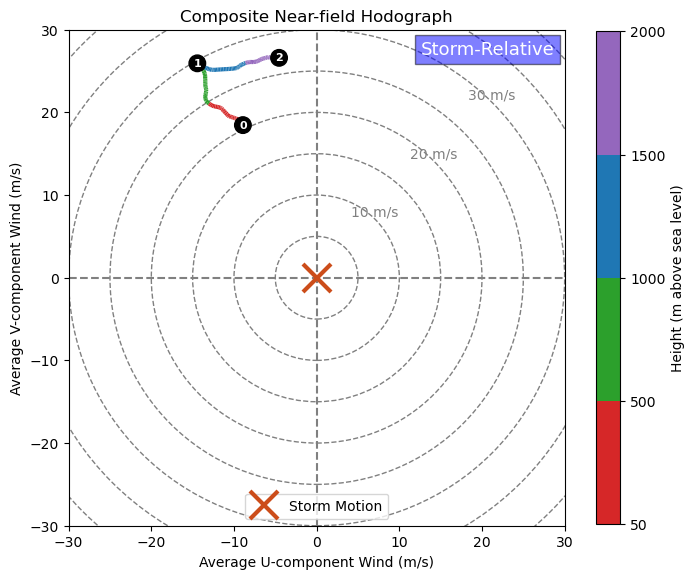

In [33]:
from matplotlib import rcParams, rcParamsDefault
title = 'Composite Near-field Hodograph'
rcParams.update(rcParamsDefault)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
hodo = metpy.plots.Hodograph(ax, component_range=30.)
hodo.add_grid(increment=5)

for speed in np.arange(10, 40, 10):  # Adjust range according to your increment and component range
    x = speed / np.sqrt(2)
    y = speed / np.sqrt(2)
    ax.text(x, y, f'{speed} m/s', color='gray', fontsize=10, ha='center', va='bottom')

colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple']
#colors = [[0.8,0.3,0.3,1],[0.2,0.7,0.3,1],[0.4,0.9,0.8,1], [0.7,0.4,0.7,1]]
boundaries = [50, 500, 1000, 1500, 2000]

h = hodo.plot_colormapped(nearfield_u, nearfield_v, nearfield_heights, intervals=boundaries, colors=colors)
# hodo.wind_vectors(nearfield_u_grady[0], nearfield_v_grady[0], label = 'Storm-Relative Wind Vector (m/s)')
# hodo.wind_vectors(nearfield_u_grady[99], nearfield_v_grady[99])
# hodo.wind_vectors(nearfield_u_grady[195], nearfield_v_grady[195])

#ax.scatter(0,0, 'ko')
ax.set_xlabel('Average U-component Wind (m/s)')
ax.set_ylabel('Average V-component Wind (m/s)')
ax.set_title(f'{title}')
for i,z in enumerate([0,95,195,295,395,495]):
    try:
        if np.isnan(nearfield_u[z]):
            pass
        else:
            circle = plt.Circle((nearfield_u[z], nearfield_v[z]), radius=1,color='k',zorder=30)
            ax.add_patch(circle)
            label = ax.annotate(i, xy=(nearfield_u[z], nearfield_v[z]), fontsize=8, ha="center",va='center',color='white',zorder=30,weight="bold")
    except: pass

ax.text(0.71, 0.96, 'Storm-Relative', transform = ax.transAxes, fontsize = 13, verticalalignment='center', color='white', bbox=dict(facecolor='blue', alpha=0.5))
plt.colorbar(h, label = 'Height (m above sea level)', shrink = 0.80)

plt.plot(0,0, 'x', markersize = 20, label = 'Storm Motion', color = [0.8,0.3,0.1,1], markeredgewidth = 3)
plt.legend(loc='lower center')
#plt.savefig('/Users/juliabman/Desktop/GradyCompNearfield_novort')
plt.show()

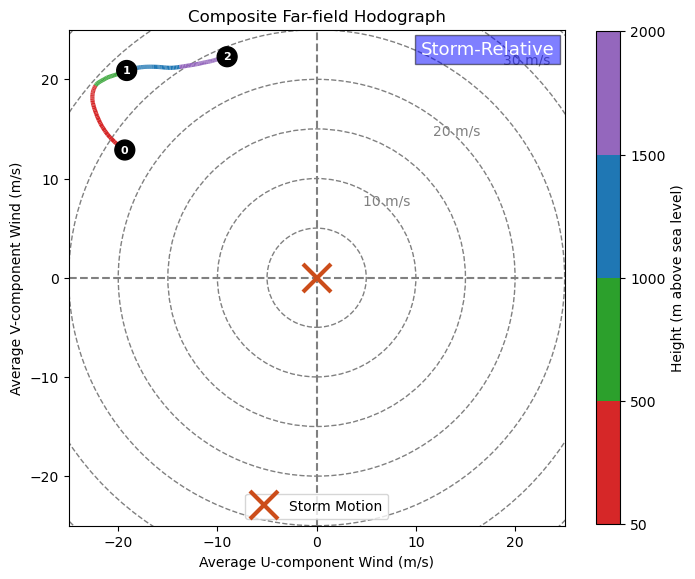

In [32]:
from matplotlib import rcParams, rcParamsDefault
title = 'Composite Far-field Hodograph'
rcParams.update(rcParamsDefault)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
hodo = metpy.plots.Hodograph(ax, component_range=25.)
hodo.add_grid(increment=5)

for speed in np.arange(10, 40, 10):  # Adjust range according to your increment and component range
    x = speed / np.sqrt(2)
    y = speed / np.sqrt(2)
    ax.text(x, y, f'{speed} m/s', color='gray', fontsize=10, ha='center', va='bottom')

colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple']
#colors = [[0.8,0.3,0.3,1],[0.2,0.7,0.3,1],[0.4,0.9,0.8,1], [0.7,0.4,0.7,1]]
boundaries = [50, 500, 1000, 1500, 2000]

h = hodo.plot_colormapped(farfield_u, farfield_v, farfield_heights, intervals=boundaries, colors=colors)
# hodo.wind_vectors(nearfield_u_grady[0], nearfield_v_grady[0], label = 'Storm-Relative Wind Vector (m/s)')
# hodo.wind_vectors(nearfield_u_grady[99], nearfield_v_grady[99])
# hodo.wind_vectors(nearfield_u_grady[195], nearfield_v_grady[195])

#ax.scatter(0,0, 'ko')
ax.set_xlabel('Average U-component Wind (m/s)')
ax.set_ylabel('Average V-component Wind (m/s)')
ax.set_title(f'{title}')
for i,z in enumerate([0,95,195,295,395,495]):
    try:
        if np.isnan(farfield_u[z]):
            pass
        else:
            circle = plt.Circle((farfield_u[z], farfield_v[z]), radius=1,color='k',zorder=30)
            ax.add_patch(circle)
            label = ax.annotate(i, xy=(farfield_u[z], farfield_v[z]), fontsize=8, ha="center",va='center',color='white',zorder=30,weight="bold")
    except: pass

ax.text(0.71, 0.96, 'Storm-Relative', transform = ax.transAxes, fontsize = 13, verticalalignment='center', color='white', bbox=dict(facecolor='blue', alpha=0.5))
plt.colorbar(h, label = 'Height (m above sea level)', shrink = 0.80)

plt.plot(0,0, 'x', markersize = 20, label = 'Storm Motion', color = [0.8,0.3,0.1,1], markeredgewidth = 3)
plt.legend(loc='lower center')
#plt.savefig('/Users/juliabman/Desktop/GradyCompNearfield_novort')
plt.show()

In [52]:
tor_vads = vad_df[vad_df.Tor == 'during tor']
tor_id = tor_vads.index.values
tor_vads = [easterlies_vads[i] for i in tor_id]

In [53]:
np.shape(tor_vads)

(5,)

In [54]:
tor_times, tor_times, tor_indeces, tor_lats, tor_lons = nearest_tobac_time(tor_vads, np.array(latitude_weighted_tobac),
                                                                                     np.array(longitude_weighted_tobac),
                                                                                     storm_times[:-1])
tor_bearing = storm_bearing[tor_indeces]
tor_velocity = storm_speed[tor_indeces]

In [55]:
tor_u, tor_v, tor_heights = composite_u_and_v(tor_vads, gps, tor_velocity, tor_bearing)

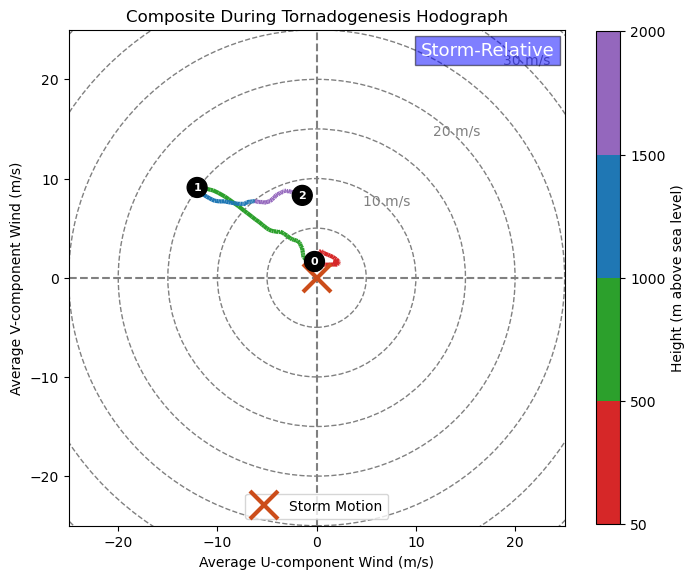

In [56]:
from matplotlib import rcParams, rcParamsDefault
title = 'Composite During Tornadogenesis Hodograph'
rcParams.update(rcParamsDefault)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
hodo = metpy.plots.Hodograph(ax, component_range=25.)
hodo.add_grid(increment=5)

for speed in np.arange(10, 40, 10):  # Adjust range according to your increment and component range
    x = speed / np.sqrt(2)
    y = speed / np.sqrt(2)
    ax.text(x, y, f'{speed} m/s', color='gray', fontsize=10, ha='center', va='bottom')

colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:purple']
boundaries = [50, 500, 1000, 1500, 2000]

h = hodo.plot_colormapped(tor_u, tor_v, tor_heights, intervals=boundaries, colors=colors)
# hodo.wind_vectors(tor_u_plains[0], tor_v_plains[0], label = 'Storm_Relative Wind Vector (m/s)')
# hodo.wind_vectors(tor_u_plains[99], tor_v_plains[99])
# #hodo.wind_vectors(tor_u_plains[195], tor_v_plains[195])

#ax.scatter(0,0, 'ko')
ax.set_xlabel('Average U-component Wind (m/s)')
ax.set_ylabel('Average V-component Wind (m/s)')
ax.set_title(f'{title}')
for i,z in enumerate([0,95,195,295,395,495]):
    try:
        if np.isnan(tor_u[z]):
            pass
        else:
            circle = plt.Circle((tor_u[z], tor_v[z]), radius=1,color='k',zorder=30)
            ax.add_patch(circle)
            label = ax.annotate(i, xy=(tor_u[z], tor_v[z]), fontsize=8, ha="center",va='center',color='white',zorder=30,weight="bold")
    except: pass

ax.text(0.71, 0.94, 'Storm-Relative', transform = ax.transAxes, fontsize = 13, verticalalignment='bottom', color='white', bbox=dict(facecolor='blue', alpha=0.5))
plt.plot(0,0, 'x', markersize = 20, label = 'Storm Motion', color = [0.8,0.3,0.1,1], markeredgewidth = 3)
plt.colorbar(h, label = 'Height (m above sea level)', shrink = 0.80)
# plt.ylim(-30, 55)
# plt.xlim(-55, 30)
plt.legend(loc='lower center')
#plt.savefig('/Users/juliabman/Desktop/SLS Images/plainsPreTorComp25_novortlow')
plt.show()

# VADs Location analysis

In [36]:
vad_df.Inflow.value_counts()

Inflow
Farfield         94
Not in Inflow    67
Nearfield        15
Name: count, dtype: int64

In [37]:
vad_df.Tor.value_counts()

Tor
post tor      104
pre tor        67
during tor      5
Name: count, dtype: int64